In [1]:
#importing necessary libraries
import opendatasets as od
import pandas as pd
import pymongo
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#reading csv files
client=pymongo.MongoClient("mongodb://127.0.0.1:27017/")
mydb=client['Mars']
info=mydb.SurfaceAnalysis
cursor = info.find()
entries=list(cursor)
mars = pd.DataFrame(entries)
mars2 = pd.DataFrame(entries)
mars3 = pd.DataFrame(entries)

mars.head()
mars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50901 entries, 0 to 50900
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   _id                   50901 non-null  object
 1   earth_date            3197 non-null   object
 2   mars_date_time        3197 non-null   object
 3   sol                   3197 non-null   object
 4   max_ground_temp       3169 non-null   object
 5   min_ground_temp       3169 non-null   object
 6   max_air_temp          3168 non-null   object
 7   min_air_temp          3168 non-null   object
 8   mean_pressure         3170 non-null   object
 9   humidity              3197 non-null   object
 10  sunrise               3197 non-null   object
 11  sunset                3197 non-null   object
 12  uv_radiation          3170 non-null   object
 13  weather               3197 non-null   object
 14  Latitude °            50901 non-null  object
 15  Latitude              50901 non-null

In [2]:
mars.rename(columns={'Latitude °':'Latitude_',
                  'Longitude °':'Longitude_'},inplace=True)

mars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50901 entries, 0 to 50900
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   _id                   50901 non-null  object
 1   earth_date            3197 non-null   object
 2   mars_date_time        3197 non-null   object
 3   sol                   3197 non-null   object
 4   max_ground_temp       3169 non-null   object
 5   min_ground_temp       3169 non-null   object
 6   max_air_temp          3168 non-null   object
 7   min_air_temp          3168 non-null   object
 8   mean_pressure         3170 non-null   object
 9   humidity              3197 non-null   object
 10  sunrise               3197 non-null   object
 11  sunset                3197 non-null   object
 12  uv_radiation          3170 non-null   object
 13  weather               3197 non-null   object
 14  Latitude_             50901 non-null  object
 15  Latitude              50901 non-null

In [3]:
mars["Latitude_"] = mars["Latitude_"].astype("int", errors='ignore')
mars["Longitude_"] = mars["Longitude_"].astype("int", errors='ignore')
mars["Difficulty Challenge"] = mars["Difficulty Challenge"].astype("int", errors='ignore')
mars["Altitude"] = mars["Altitude"].astype("int", errors='ignore')
mars["Temperature"] = mars["Temperature"].astype("int", errors='ignore')
mars["Metals"] = mars["Metals"].astype("int", errors='ignore')
mars["Rare Metals"] = mars["Rare Metals"].astype("int", errors='ignore')
mars["Concrete"] = mars["Concrete"].astype("int", errors='ignore')
mars["Water"] = mars["Water"].astype("int", errors='ignore')
mars["Dust Devils"] = mars["Dust Devils"].astype("int", errors='ignore')
mars["Dust Storms"] = mars["Dust Storms"].astype("int", errors='ignore')
mars["Meteors"] = mars["Meteors"].astype("int", errors='ignore')
mars["Cold Waves"] = mars["Cold Waves"].astype("int", errors='ignore')

In [4]:
mars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50901 entries, 0 to 50900
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   _id                   50901 non-null  object
 1   earth_date            3197 non-null   object
 2   mars_date_time        3197 non-null   object
 3   sol                   3197 non-null   object
 4   max_ground_temp       3169 non-null   object
 5   min_ground_temp       3169 non-null   object
 6   max_air_temp          3168 non-null   object
 7   min_air_temp          3168 non-null   object
 8   mean_pressure         3170 non-null   object
 9   humidity              3197 non-null   object
 10  sunrise               3197 non-null   object
 11  sunset                3197 non-null   object
 12  uv_radiation          3170 non-null   object
 13  weather               3197 non-null   object
 14  Latitude_             50901 non-null  int64 
 15  Latitude              50901 non-null

In [5]:
mars["Temperature"] = pd.to_numeric(mars["Temperature"])
mars["Altitude"] = pd.to_numeric(mars["Altitude"])
# mars.replace({'Topography':{'Relatively Flat':1,
#                           'Steep':2,
#                           'Rough':3,
#                           'Mountainous':4},
#            'Difficulty Challenge':{100:0,
#                                   140:1,
#                                   180:2,
#                                   200:3,
#                                   220:4,
#                                   240:5}},
#            inplace=True)

mapping = {
    'Topography': {
        'Relatively Flat': 1,
        'Steep': 2,
        'Rough': 3,
        'Mountainous': 4
    },
    'Difficulty Challenge': {
        100: 0,
        140: 1,
        180: 2,
        200: 3,
        220: 4,
        240: 5
    }
}

mars.replace(mapping, inplace=True)

# for i in range(mars.shape[0]):
#     if mars.at[i,'Altitude'] <= 0:
#         mars.at[i,'Altitude'] = 0
#     elif mars.at[i,'Altitude'] > 0 and mars.at[i,'Altitude']<=5e3:
#         mars.at[i,'Altitude'] = 1
#     elif mars.at[i,'Altitude'] > 5e3 and mars.at[i,'Altitude'] <= 10e3:
#         mars.at[i,'Altitude'] = 2
#     elif mars.at[i,'Altitude'] > 10e3 and mars.at[i,'Altitude'] <= 15e3:
#         mars.at[i,'Altitude'] = 3
#     else:
#         mars.at[i,'Altitude'] = 4
        
#     if mars.at[i,'Temperature'] >= -20:
#         mars.at[i,'Temperature'] = 0
#     elif mars.at[i,'Temperature'] > -20 and mars.at[i,'Temperature'] <= -40:
#         mars.at[i,'Temperature'] = 1
#     elif mars.at[i,'Temperature'] > -40 and mars.at[i,'Temperature'] <= -60:
#         mars.at[i,'Temperature'] = 2
#     elif mars.at[i,'Temperature'] > -60 and mars.at[i,'Temperature'] <= -80:
#         mars.at[i,'Temperature'] = 3
#     else:
#         mars.at[i,'Temperature'] = 4



def map_altitude(altitude):
    if altitude <= 0:
        return 0
    elif altitude <= 5e3:
        return 1
    elif altitude <= 10e3:
        return 2
    elif altitude <= 15e3:
        return 3
    else:
        return 4

def map_temperature(temperature):
    if temperature >= -20:
        return 0
    elif temperature > -20 and temperature <= -40:
        return 1
    elif temperature > -40 and temperature <= -60:
        return 2
    elif temperature > -60 and temperature <= -80:
        return 3
    else:
        return 4

mars['Altitude'] = mars['Altitude'].apply(map_altitude)
mars['Temperature'] = mars['Temperature'].apply(map_temperature)


In [6]:
mars['Disaster']= np.sum(mars.iloc[:,19:30],axis=1)

In [7]:
# fig = px.scatter_geo(mars,lat='Latitude_', lon='Longitude_', color='Disaster',
#                         hover_name= 'Map Name', hover_data=['Disaster','Altitude','Temperature'],
#                         fitbounds = 'locations', basemap_visible=False,
#                         projection='orthographic')
# fig.update_layout(title = 'Disaster Scatter')
# fig.show()



Diagram = px.scatter_geo(mars,lat='Latitude_', lon='Longitude_', color='Disaster',
                        hover_name= 'Map Name', hover_data=['Disaster','Altitude','Temperature'],
                        fitbounds = 'locations', basemap_visible=False,
                        projection='orthographic',
                        size='Disaster',
                        title='Disaster Graph on Mars Surface')
Diagram.show()

In [8]:
sub_data = mars[['Disaster']]
sub_data.info()
sub_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50901 entries, 0 to 50900
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Disaster  50901 non-null  int64
dtypes: int64(1)
memory usage: 397.8 KB


Disaster
0        18
1        17
2        18
3        18
4        19

In [9]:
class KMeanss:
    def __init__(self, n_clusters=20, max_iter=300, random_state=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def fit(self, X):
        if self.random_state:
            np.random.seed(self.random_state)
        initial = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.cluster_centers_ = X[initial]

        for _ in range(self.max_iter):
            self.labels_ = [self._nearest(self.cluster_centers_, x) for x in X]
            indices = [[i for i, l in enumerate(self.labels_) if l == j]
                        for j in range(self.n_clusters)]
            X_by_cluster = [X[i] for i in indices]
            # update the clusters
            self.cluster_centers_ = [
                c.sum(axis=0) / len(c) if len(c) > 0 else c[0]
                for c in X_by_cluster if len(c) > 0
            ]
        # sum of square distances from the closest cluster
        self.inertia_ = sum(((self.cluster_centers_[l] - x)**2).sum()
                            for x, l in zip(X, self.labels_))
        return self

    def _nearest(self, clusters, x):
        return np.argmin([self._distance(x, c) for c in clusters])

    def _distance(self, a, b):
        return np.sqrt(((a - b)**2).sum())

    def predict(self, X):
        return self.labels_

    def transform(self, X):
        return [[self._distance(x, c) for c in self.cluster_centers_] for x in X]

    def fit_predict(self, X):
        return self.fit(X).predict(X)

    def fit_transform(self, X):
        return self.fit(X).transform(X)

    def score(self, X):
        return -self.inertia_




In [10]:
way = KMeans(20, random_state=42).fit_predict(sub_data)
(unique, counts)=np.unique(way, return_counts=True)
print(" Cluster label along its number of elements in it:\n",
      list(zip(unique,counts)))

 Cluster label along its number of elements in it:
 [(0, 3848), (1, 4715), (2, 1074), (3, 1596), (4, 5858), (5, 2025), (6, 514), (7, 4189), (8, 5492), (9, 3319), (10, 5259), (11, 2488), (12, 3490), (13, 2305), (14, 312), (15, 1525), (16, 1136), (17, 875), (18, 764), (19, 117)]


In [11]:
mars['Group']=way.tolist()
mars.sort_values('Disaster')

_id earth_date mars_date_time  sol  \
41946  63921d095c7c7bce96dac08e        NaN            NaN  NaN   
43414  63921d095c7c7bce96dac64a        NaN            NaN  NaN   
41938  63921d095c7c7bce96dac086        NaN            NaN  NaN   
41962  63921d095c7c7bce96dac09e        NaN            NaN  NaN   
41934  63921d095c7c7bce96dac082        NaN            NaN  NaN   
...                         ...        ...            ...  ...   
21747  63921d045c7c7bce96da71a7        NaN            NaN  NaN   
19581  63921d045c7c7bce96da6931        NaN            NaN  NaN   
22481  63921d055c7c7bce96da7485        NaN            NaN  NaN   
22485  63921d055c7c7bce96da7489        NaN            NaN  NaN   
23925  63921d055c7c7bce96da7a29        NaN            NaN  NaN   

      max_ground_temp min_ground_temp max_air_temp min_air_temp mean_pressure  \
41946             NaN             NaN          NaN          NaN           NaN   
43414             NaN             NaN          NaN          NaN           NaN   
41938             NaN             NaN          NaN          NaN           NaN   
41962             NaN             NaN          NaN          NaN           NaN   
41934             NaN             NaN          NaN          NaN           NaN   
...               ...             ...          ...          ...           ...   
21747             NaN             NaN          NaN          NaN           NaN   
19581             NaN             NaN          NaN          NaN           NaN   
22481             NaN             NaN          NaN          NaN           NaN   
22485             NaN             NaN          NaN          NaN           NaN   
23925             NaN             NaN          NaN          NaN           NaN   

      humidity  ... Dust Devils Dust Storms Meteors Cold Waves  \
41946      NaN  ...           1           1       2          1   
43414      NaN  ...           2           1       2          1   
41938      NaN  ...           2           1       2          1   
41962      NaN  ...           2           1       2          1   
41934      NaN  ...           2           1       2          1   
...        ...  ...         ...         ...     ...        ...   
21747      NaN  ...           1           4       3          4   
19581      NaN  ...           1           4       3          3   
22481      NaN  ...           1           4       3          4   
22485      NaN  ...           1           4       3          4   
23925      NaN  ...           1           4       3          4   

                     Map Name avg_ground_temp  avg_air_temp Named Location  \
41946  BlankBigTerraceCMix_14             NaN           NaN            NaN   
43414             BlankBig_03             NaN           NaN            NaN   
41938             BlankBig_02             NaN           NaN            NaN   
41962             BlankBig_01             NaN           NaN            NaN   
41934             BlankBig_04             NaN           NaN            NaN   
...                       ...             ...           ...            ...   
21747  BlankBigTerraceCMix_10             NaN           NaN            NaN   
19581  BlankBigTerraceCMix_10             NaN           NaN            NaN   
22481  BlankBigTerraceCMix_10             NaN           NaN            NaN   
22485  BlankBigTerraceCMix_10             NaN           NaN            NaN   
23925  BlankBigTerraceCMix_10             NaN           NaN            NaN   

       Disaster  Group  
41946        10     14  
43414        11     14  
41938        11     14  
41962        11     14  
41934        11     14  
...         ...    ...  
21747        35     19  
19581        35     19  
22481        36     19  
22485        36     19  
23925        36     19  

[50901 rows x 36 columns]

In [12]:
df1 = mars[mars['Group'].isin([12])]
df2 = mars[mars['Group'] != 12]

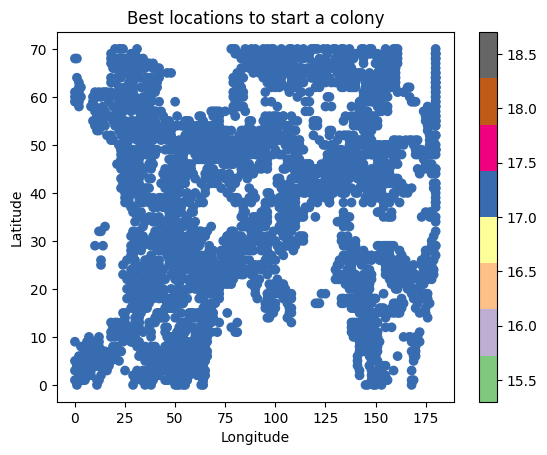

In [16]:

# create a scatter plot of the locations
plt.scatter(df1['Longitude_'], df1['Latitude_'], c=df1['Disaster'], cmap='Accent')

# add a color bar to indicate the type of disaster at each location
plt.colorbar()

# set the x- and y-axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# set the plot title
plt.title('Best locations to start a colony')

# show the plot
plt.show()